# **1.Data visualization**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/airline/AirQualityUCI.csv


In [2]:
df = pd.read_csv("/kaggle/input/airline/AirQualityUCI.csv", sep =";", decimal =",")
df = df.iloc[:, 0:14]

In [4]:
df.shape

(9471, 14)

In [5]:
df.head

<bound method NDFrame.head of             Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    11

In [6]:
df.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
dtype: int64

In [13]:
df = df[df['Date'].notnull()]

In [14]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
DateTime         0
dtype: int64

In [15]:
df['DateTime'] = (df.Date) + " " + (df.Time)
print(type(df.DateTime[0]))

<class 'str'>


/tmp/ipykernel_34/3175831127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = (df.Date) + " " + (df.Time)


In [16]:
print(df.DateTime[0])

10/03/2004 18.00.00


In [17]:
import datetime

In [18]:
df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))
print (type(df.DateTime[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


/tmp/ipykernel_34/3634870040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d/%m/%Y %H.%M.%S'))


In [19]:
df.index = df.DateTime

In [20]:
import matplotlib.pyplot as plt

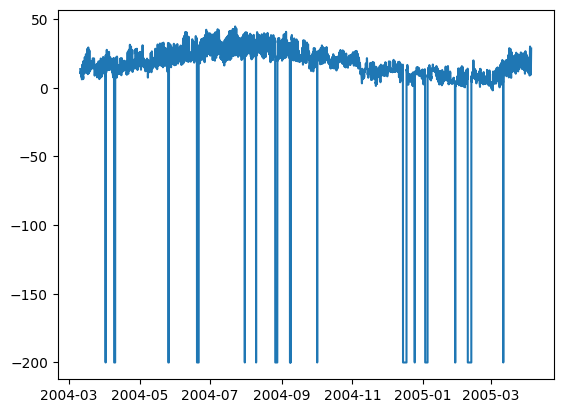

In [21]:
plt.plot(df['T'])

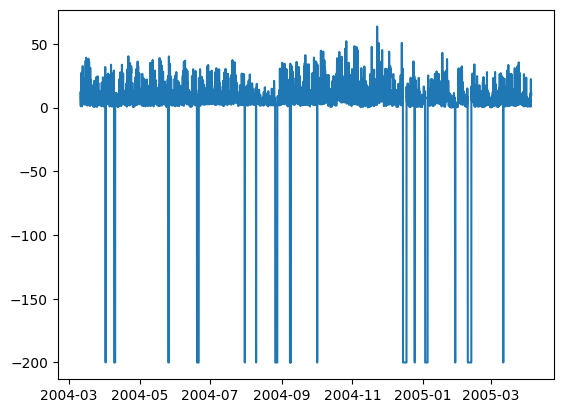

In [22]:
plt.plot(df['C6H6(GT)'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a9b79e80790>,
 'caps': [<matplotlib.lines.Line2D at 0x7a9b79e83a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a9b79e81d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7a9b51700160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a9b51700400>],
 'means': []}

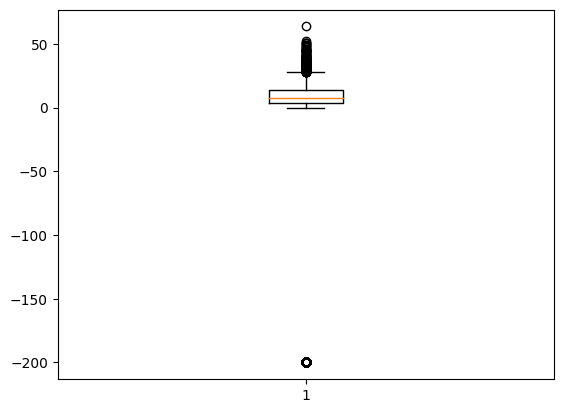

In [57]:
plt.boxplot(df['C6H6(GT)'].values)

# **2.Naive Methods**

In [25]:
print('Mean: ', np.mean(df['T']))
print('Standard Deviation: ', np.std(df['T']))
print('Maximum Temperature: ', np.max(df['T']))
print('Minimum Temperature: ', np.min(df['T']))

Mean:  9.778305012290264
Standard Deviation:  43.201314375146595
Maximum Temperature:  44.6
Minimum Temperature:  -200.0


>#  1st naive method

In [37]:
df['T']
df['T_t-1'] = df['T'].shift(1)

/tmp/ipykernel_34/3840504843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T_t-1'] = df['T'].shift(1)


In [38]:
df['T'].shape

(9357,)

In [40]:
df['T_t-1'].shape

(9357,)

In [42]:
df_naive = df[['T','T_t-1']][1:]

In [43]:
from sklearn import metrics
from math import sqrt

true = df_naive['T']
prediction = df_naive['T_t-1']

error = sqrt(metrics.mean_squared_error(true,prediction))
print('RMSE for Naive Method 1: ', error)

RMSE for Naive Method 1:  12.901140576492974


>#  2nd naive method

In [46]:
df['T_rm'] = df['T'].rolling(3).mean().shift(1)
df_naive = df[['T','T_rm']].dropna()

/tmp/ipykernel_34/436505177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T_rm'] = df['T'].rolling(3).mean().shift(1)


In [47]:
true = df_naive['T']
prediction = df_naive['T_rm']
error = sqrt(metrics.mean_squared_error(true, prediction))
print('RMSE for Naive Method 2: ', error)

RMSE for Naive Method 2:  14.957633272839242


# **3.Auto Regression**

In [48]:
split = len(df) - int(0.2*len(df))
train, test = df['T'][:split], df['T'][split:]

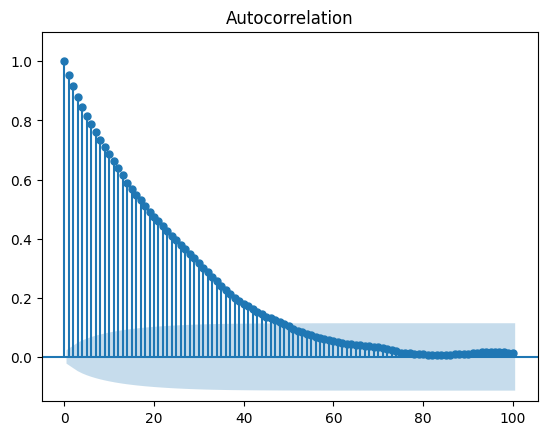

In [62]:
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train, lags=100)
plt.ylim(-0.15, 1.1)
plt.show()

# **4.Moving Average**

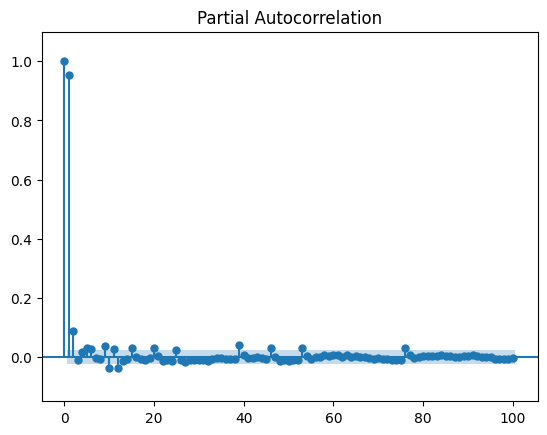

In [63]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train, lags=100)
plt.ylim(-0.15, 1.1)
plt.show()

# **5.ARIMA**